## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


### Find no.of samples are there in training and test datasets

In [2]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [3]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

### Find dimensions of an image in the dataset

(28, 28)

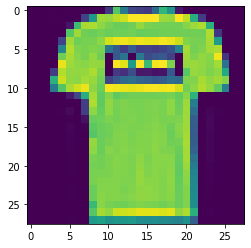

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])
x_train[1].shape

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [5]:
from keras.utils import np_utils
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [0]:
x_train/=255
x_test/=255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)    # The digit 1 signifies the images are in grayscale
x_test=x_test.reshape(x_test.shape[0],28,28,1)

### Import the necessary layers from keras to build the model

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [10]:
input_shape = (28,28,1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu')) 
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train, y_train,epochs=10,callbacks=[EarlyStopping(patience=5)],validation_data=(x_test, y_test))




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2359424   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 2,370,282
Trainable params: 2,370,282
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [11]:
input_shape = (28,28,1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu')) 
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train, y_train,epochs=10,callbacks=[EarlyStopping(patience=5)],validation_data=(x_test, y_test))



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
___

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

In [0]:
datagen = ImageDataGenerator(rotation_range=15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.5,zoom_range=0.2)

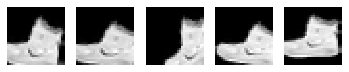

In [14]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [15]:
datagen.fit(x_train)
model.fit_generator(datagen.flow(x_train,y_train),epochs=10,callbacks=[EarlyStopping(patience=5)],validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.7218 - acc: 0.7327 - val_loss: 0.4004 - val_acc: 0.8487
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5529 - acc: 0.7923 - val_loss: 0.3404 - val_acc: 0.8738
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.5078 - acc: 0.8111 - val_loss: 0.3324 - val_acc: 0.8777
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4795 - acc: 0.8200 - val_loss: 0.3180 - val_acc: 0.8819
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4648 - acc: 0.8280 - val_loss: 0.3178 - val_acc: 0.8838
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4511 - acc: 0.8337 - val_loss: 0.3335 - val_acc: 0.8761
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4398 - acc: 0.8361 - val_loss: 0.3316 - val_acc: 0.8791
Epoch 8/10
1875/1875 [==============================] -

###  Report the final train and validation accuracy

In [16]:
score = model.evaluate(x_test, y_test)
score

10000/10000 [==============================] - 0s 43us/step


[0.3397601789116859, 0.88]

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.datasets import cifar10
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

### **Load CIFAR10 dataset**

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
data_gen = ImageDataGenerator(rotation_range=90,horizontal_flip=True,width_shift_range=0.2,height_shift_range=0.2)

### **Prepare/fit the generator.**

In [0]:
data_gen.fit(X_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

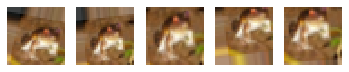

In [27]:
from matplotlib import pyplot as plt
gen = datagen.flow(X_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()